Introduction
============

This is interactive work-sheet regarding "Introduction to path planning" (Author: Björn Hein).

Version | Author
------------ | -------------
0.2 | Björn Hein


License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This work-sheet conatains a second draft version to implement the A\* algorithm for path planning applications in Python. 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Calculating hash value for nodes needed for the close-list
====================================

As the close-list of the $A^*$ is typically implemented via a *hash-map* and therefore an appropriate hash-function has to be provided to identify the nodes. A suitable way are a key based on the coordinates of the nodes, as there are unique.

A*
==

In the following there is an example for programming an A*-like path planning algorithm with some modifications. Please check Slides "AStar-Basics.pdf".

*Remark: handleNode and expandNode are in this example merged to one function*

In [21]:
from IPAStar import AStar
from IPVISAStar import aStarVisualize
import matplotlib.pylab as plt

In [22]:
import IPTestSuite as ts

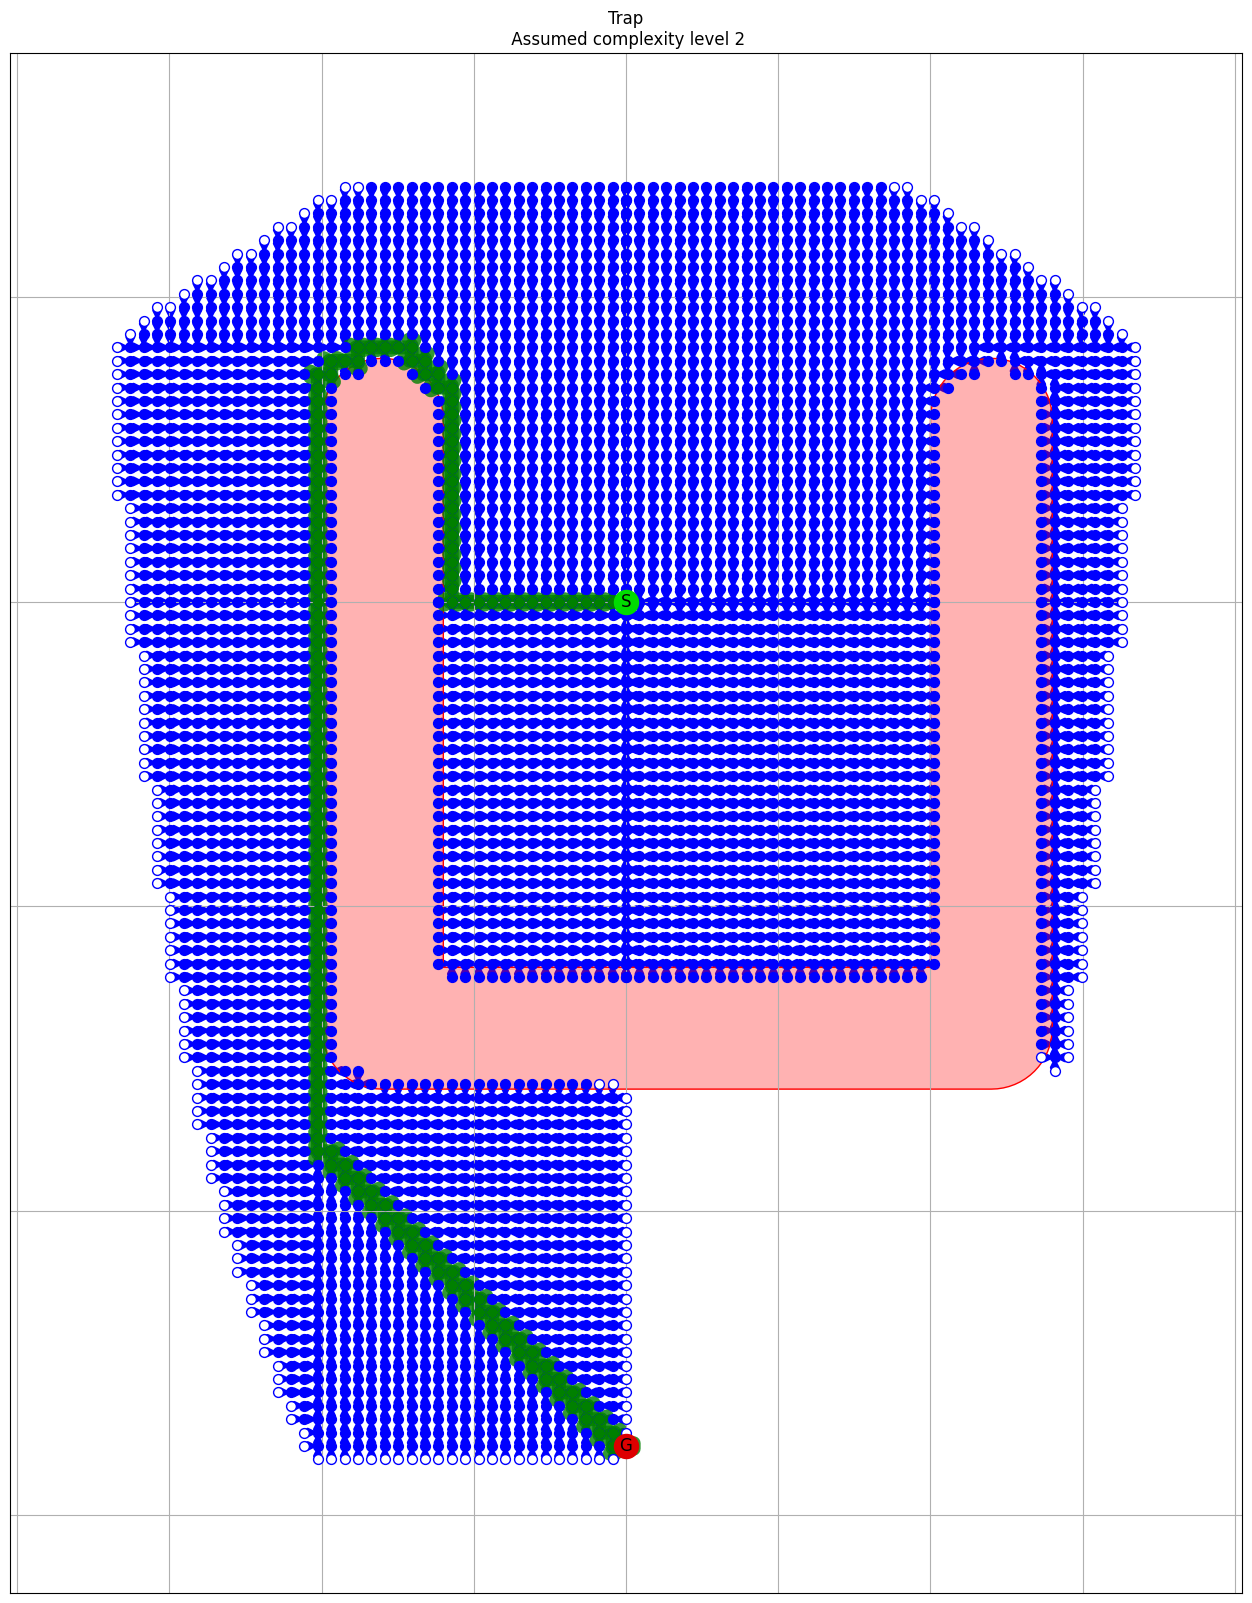

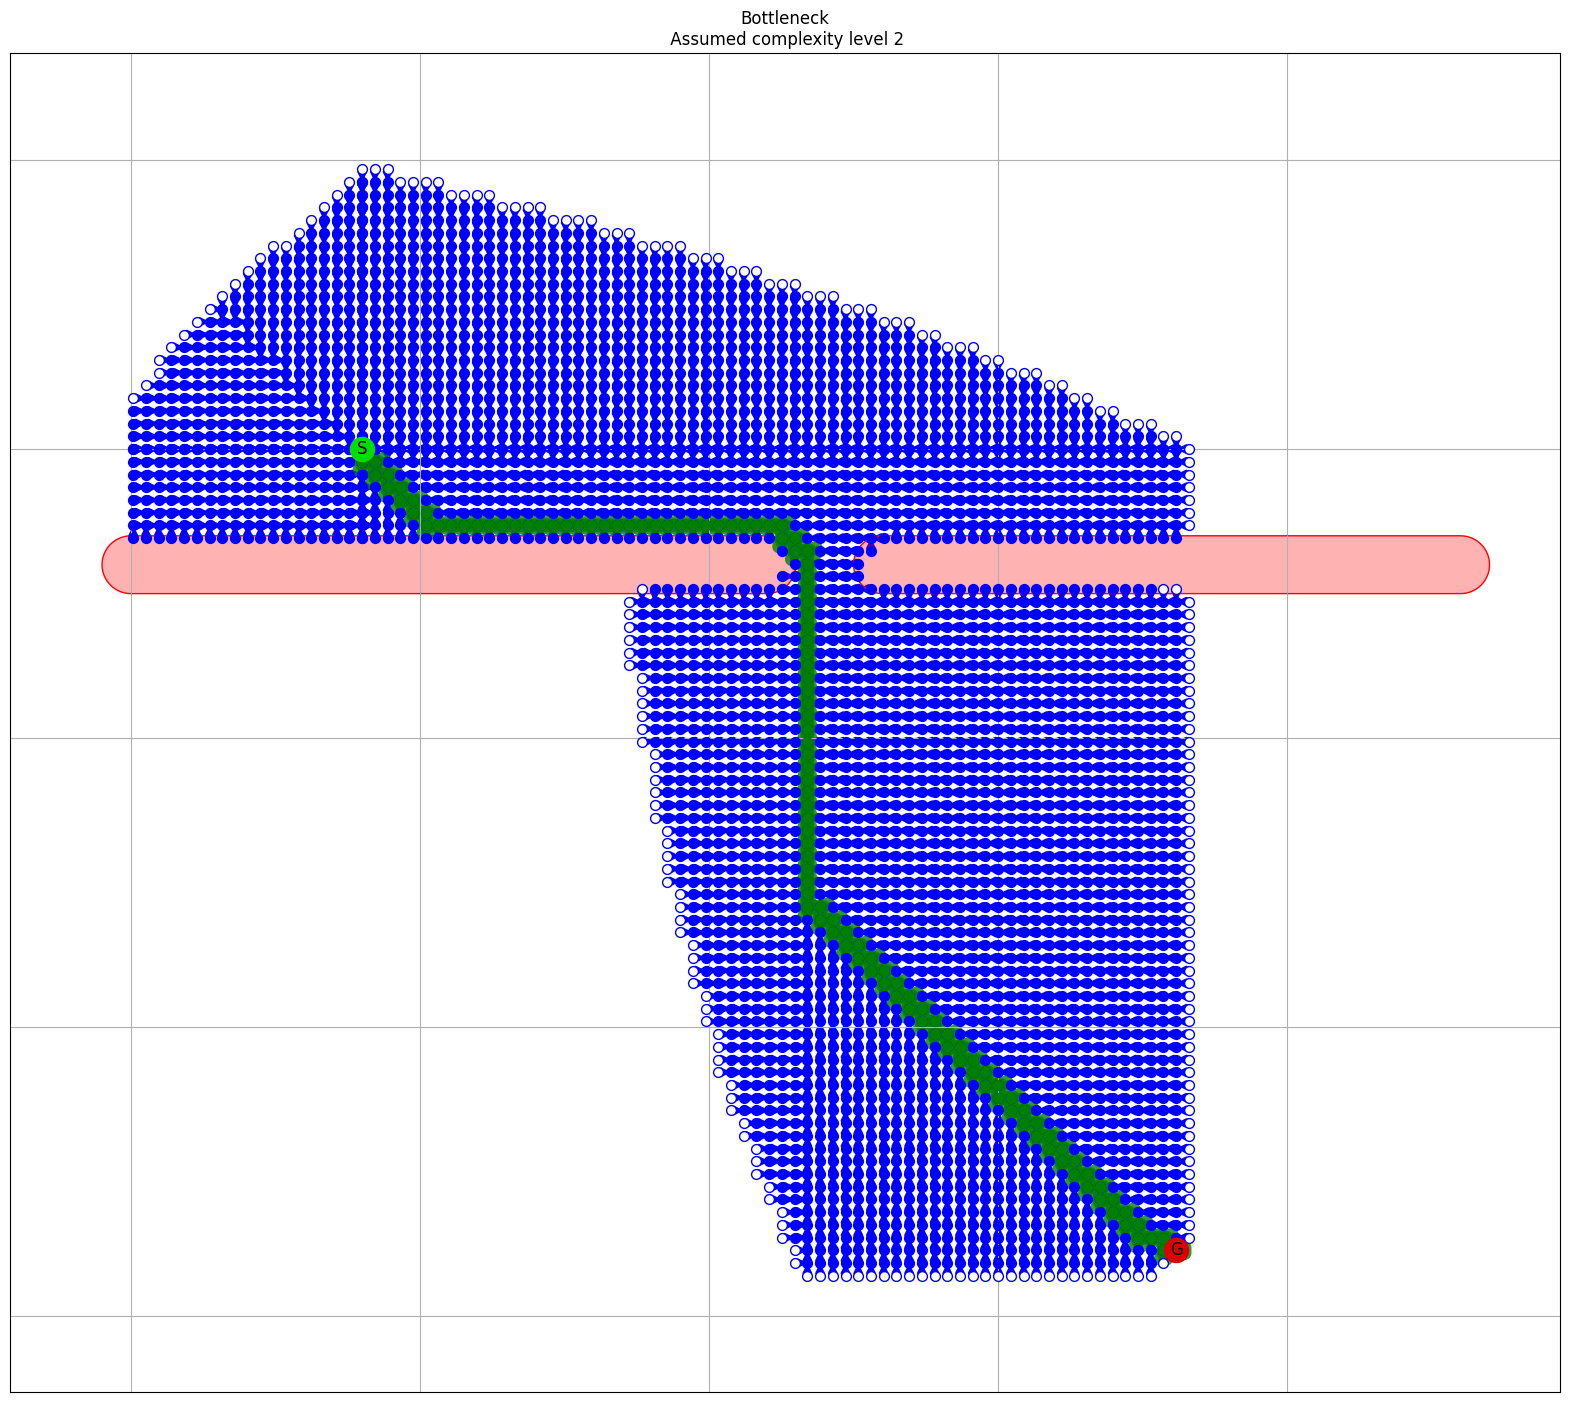

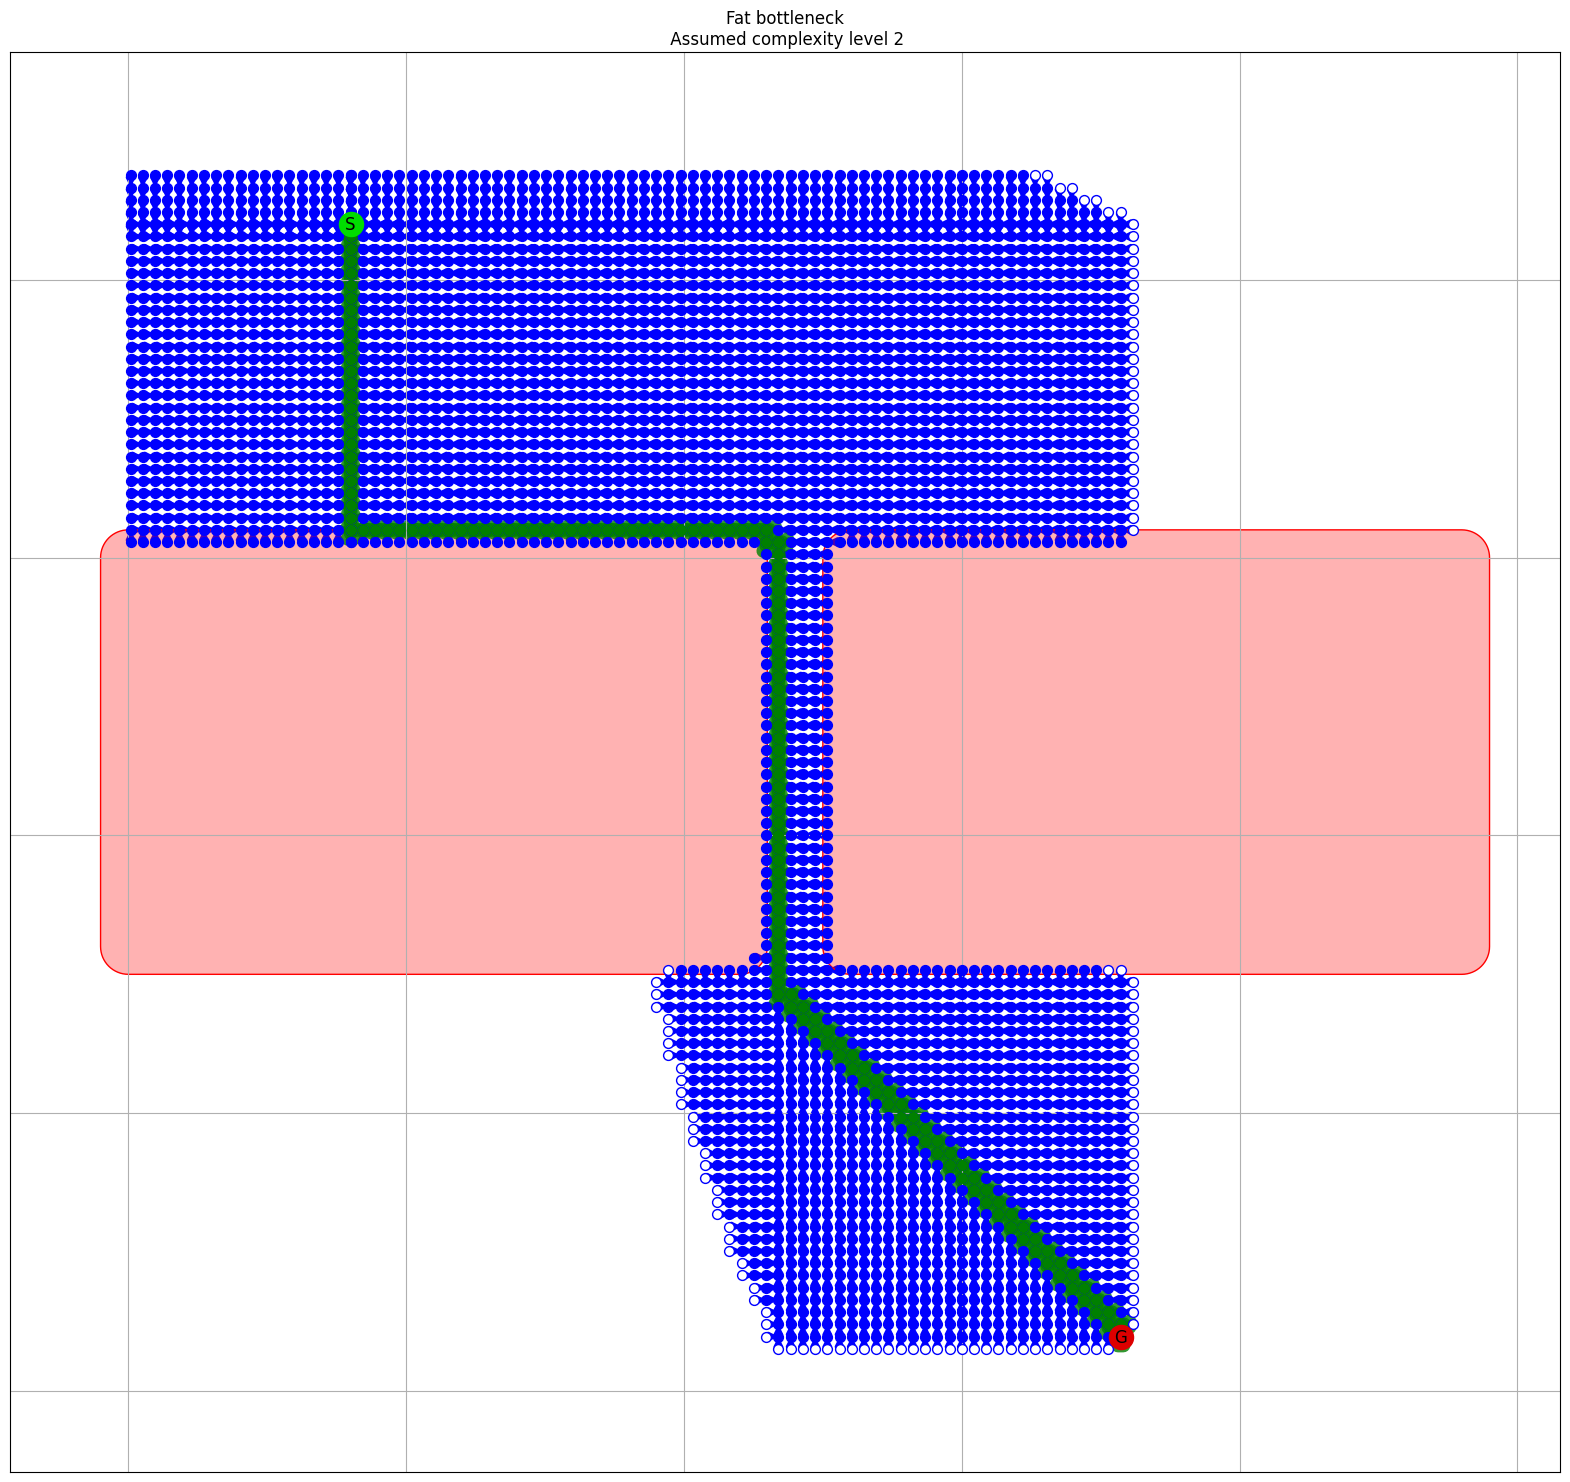

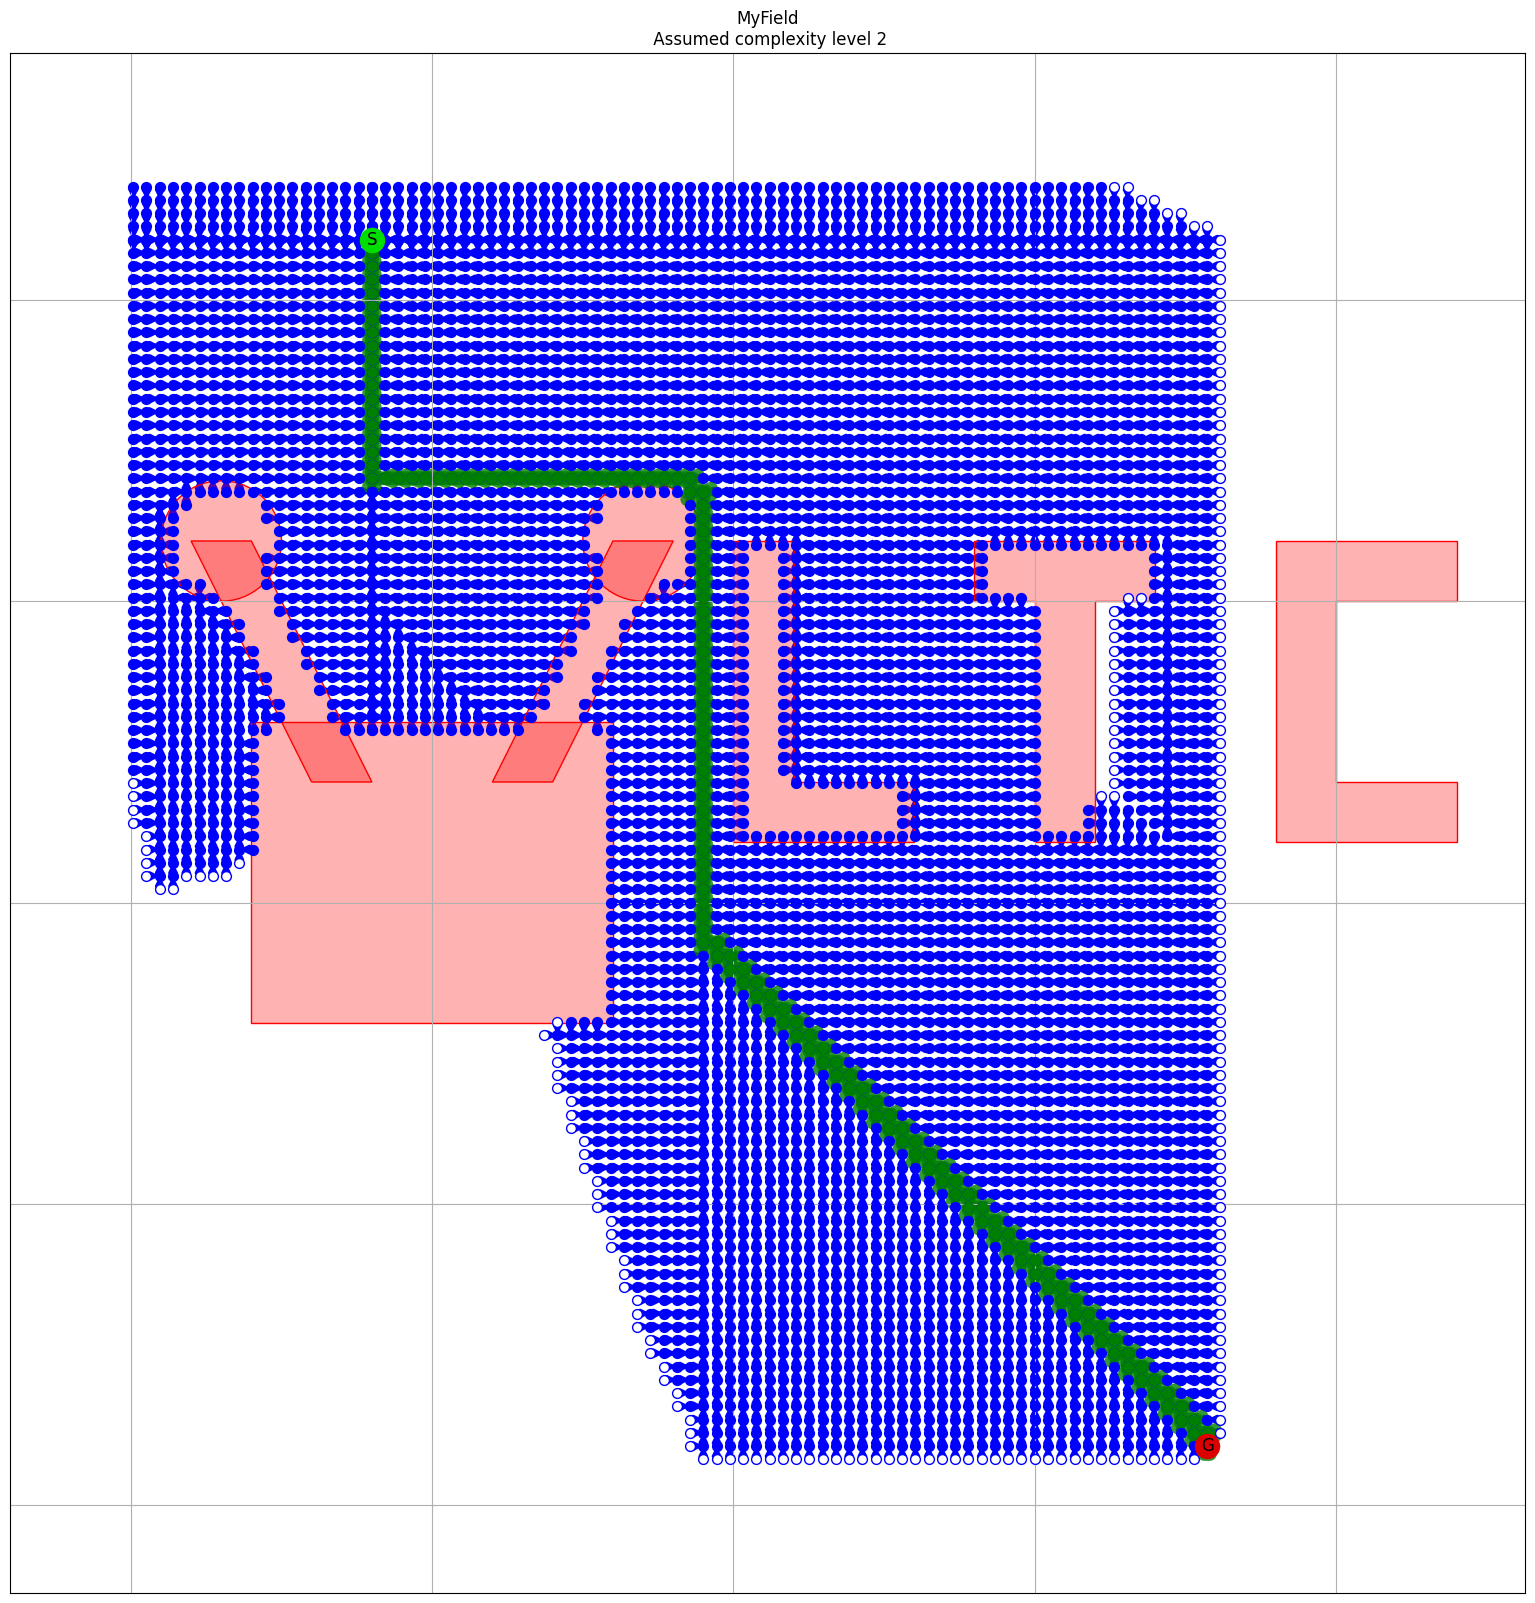

In [23]:
astarConfig = dict()
astarConfig["w"] = .5
astarConfig["heuristic"]  = "euclidean"

for benchmark in ts.benchList:
    try:
        fig_local = plt.figure(figsize=(20,20))
        ax = fig_local.add_subplot(1,1,1)
        astar = AStar(benchmark.collisionChecker)
        solution = astar.planPath(benchmark.startList, benchmark.goalList, astarConfig)
        title = benchmark.name
        if solution == []:
            title += " (No path found!)"
        title += "\n Assumed complexity level " + str(benchmark.level)
        ax.set_title(title)
        aStarVisualize(astar, solution, ax=ax, nodeSize=50)
    except Exception as e:
        print("ERROR: ",benchmark.name, e)

Questions:

* What could be useful to be checked in function setStartGoal besides start and goal having the same dimension?
* What is missing for a correct implementation of the A*? 
  * Why does this version not necessarily find the best solution? 
  * Why is it nevertheless useful to do so?



### Do the planning

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

from shapely.geometry import Point, Polygon, LineString
from IPEnvironment import CollisionChecker

# Definition of a testing environment
trapField = dict()
trapField["obs1"] =   LineString([(6, 18), (6, 8), (16, 8), (16,18)]).buffer(1.0)

environment = CollisionChecker(trapField)


start = [[10,20]]
goal  = [[13,1]]

# AStar
astar = AStar(environment)

# To know what is part on the config please consult the documentation of planPath
astarConfig = dict()
astarConfig["w"] = .5

astarConfig["heuristic"]  = "euclidean"

# Erweiterung für Kantenkollision -- Ludwig
# NEU: Aktiviert Kantenkollisionsprüfung
astarConfig["checkEdgeCollision"] = True 
# Ende Erweiterung für Kantenkollision -- Ludwig

solution = astar.planPath(start, goal, astarConfig )


### Do the visualization

* Idea: Show internal data of AStar
* show closeList and the evaluated values for these nodes
* add these information in a matrix

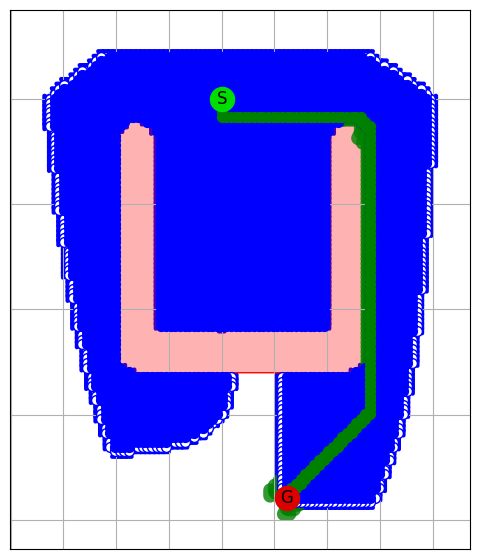

In [25]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
aStarVisualize(astar, solution, ax = ax, nodeSize=50)

Experiments
===========

* Change evaluation function to f(n) = w * h + (1-w) * g, and visualize results
* Implement another heuristic (e.g. Euklid) and make it switchable via a parameter.


## Matzes A-Star

In [ ]:
# Temporär durch kommentieren welche Version von Matze verwendet wird
from AStarReopening import ReopenAStar
#from AStarWithReopening import ReopenAStar

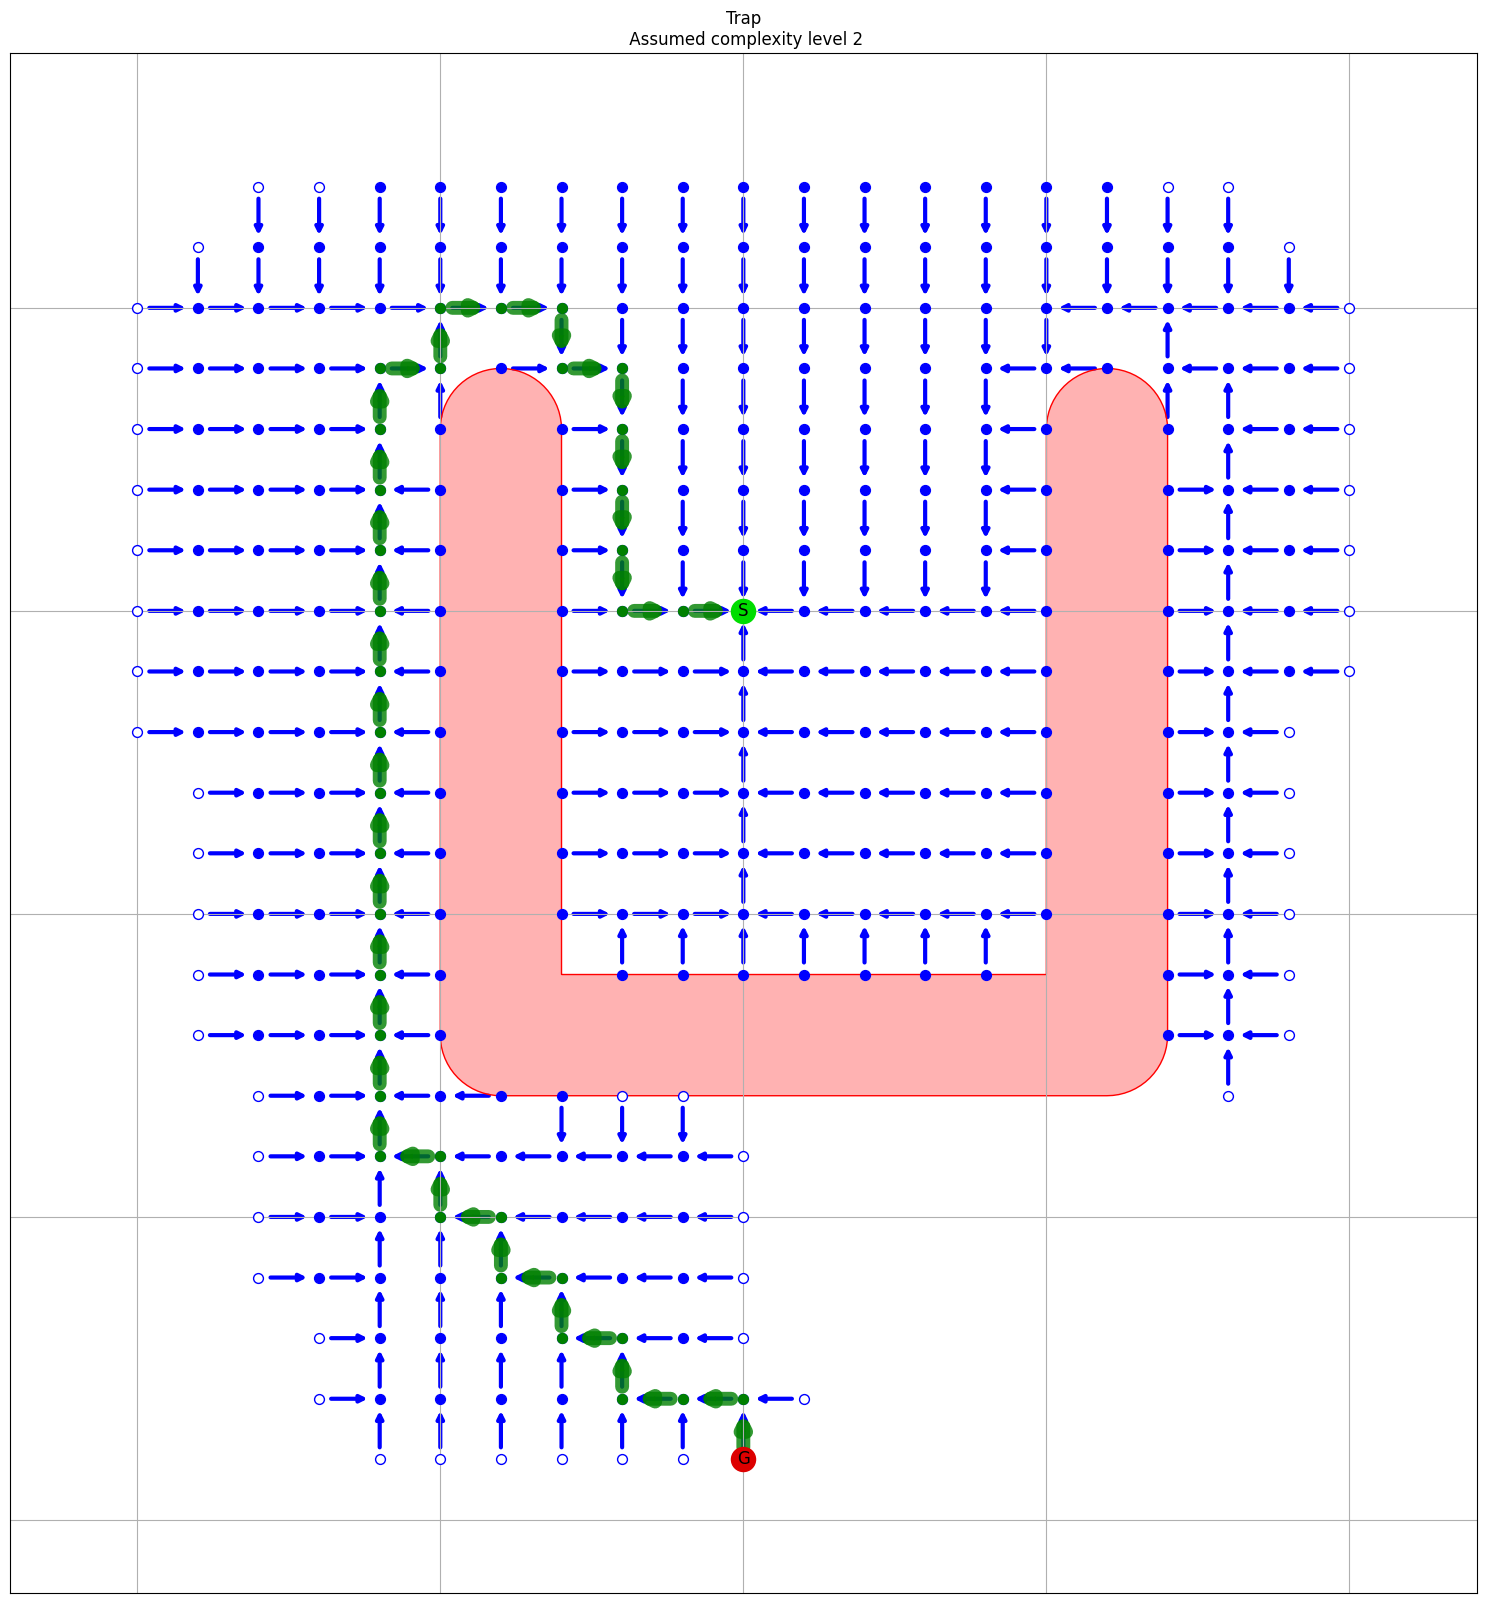

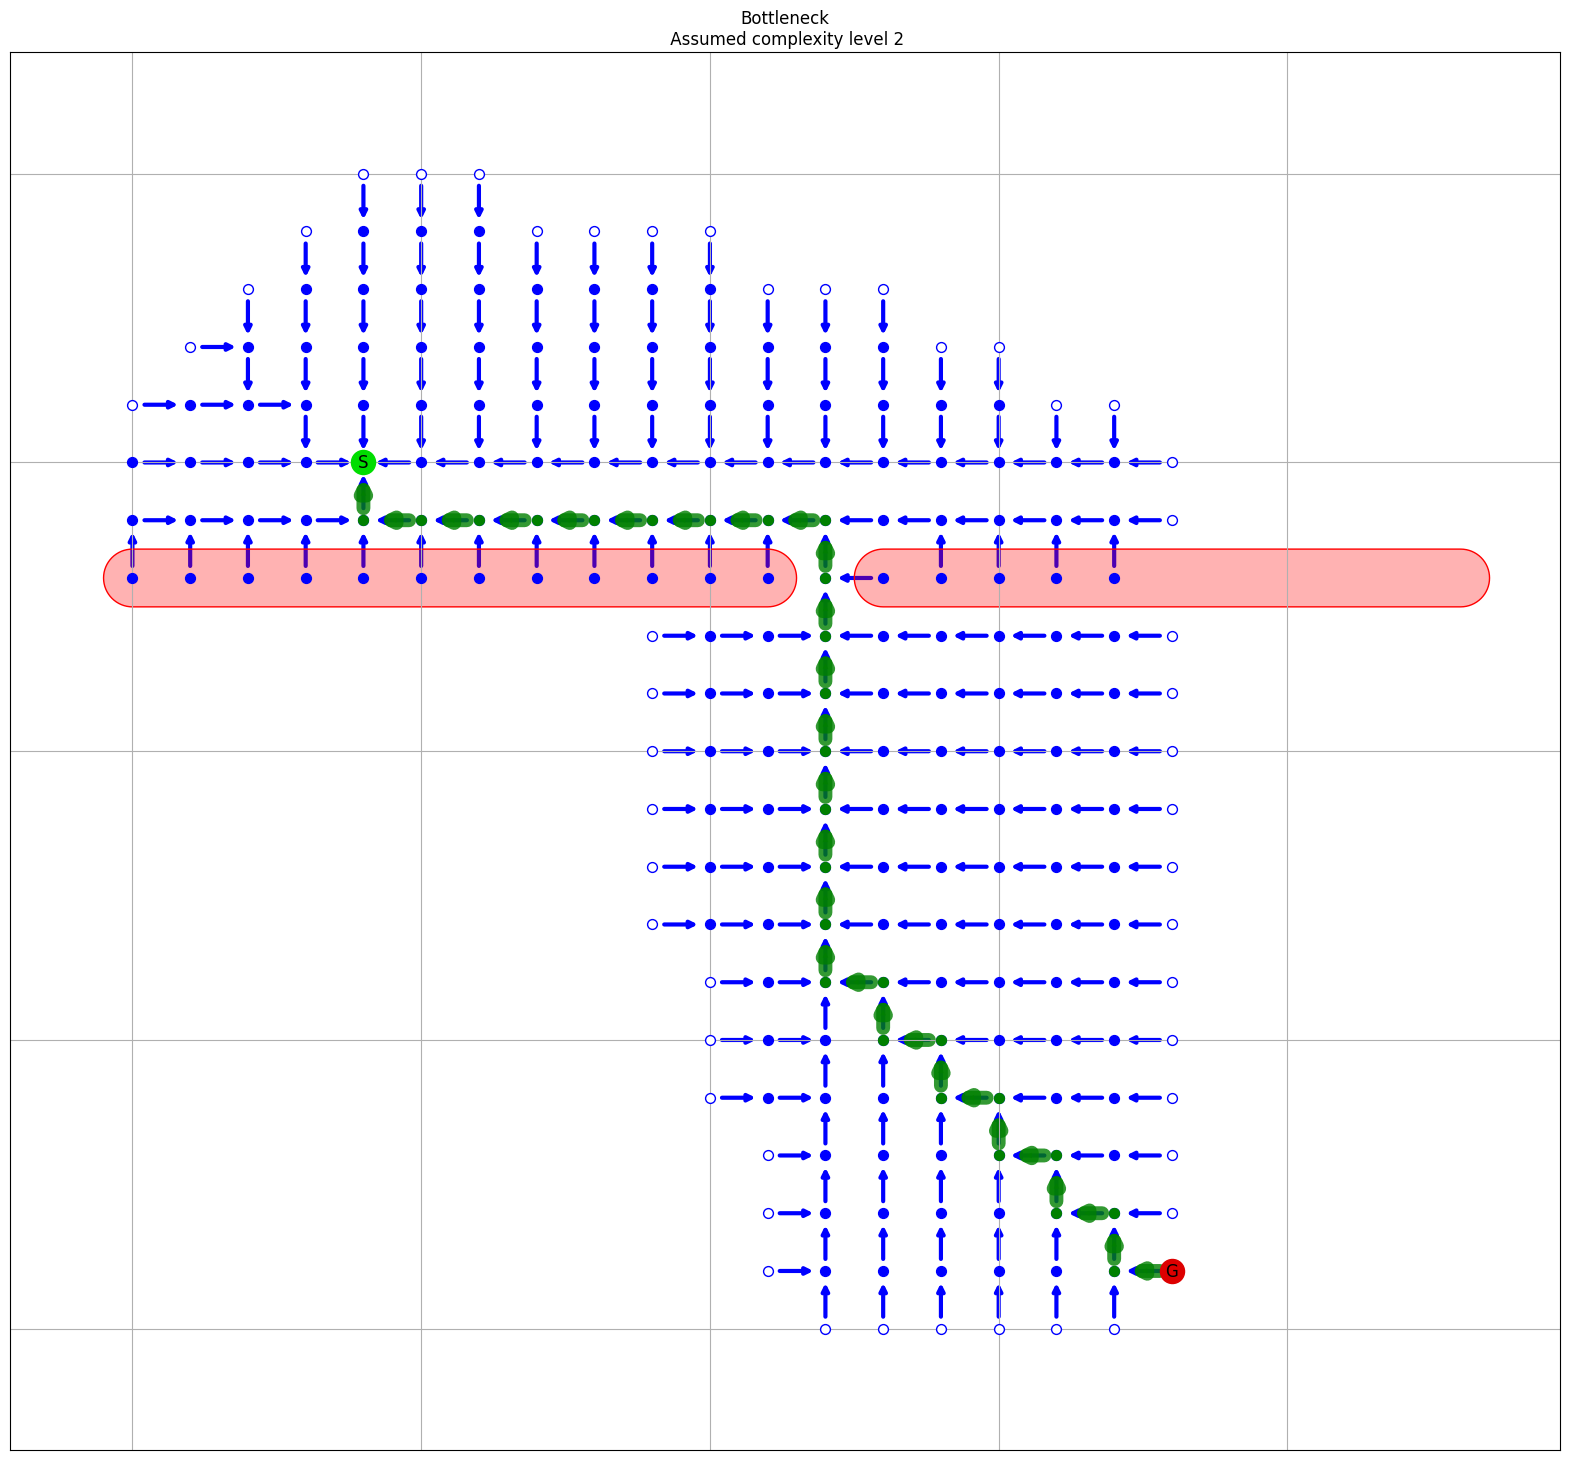

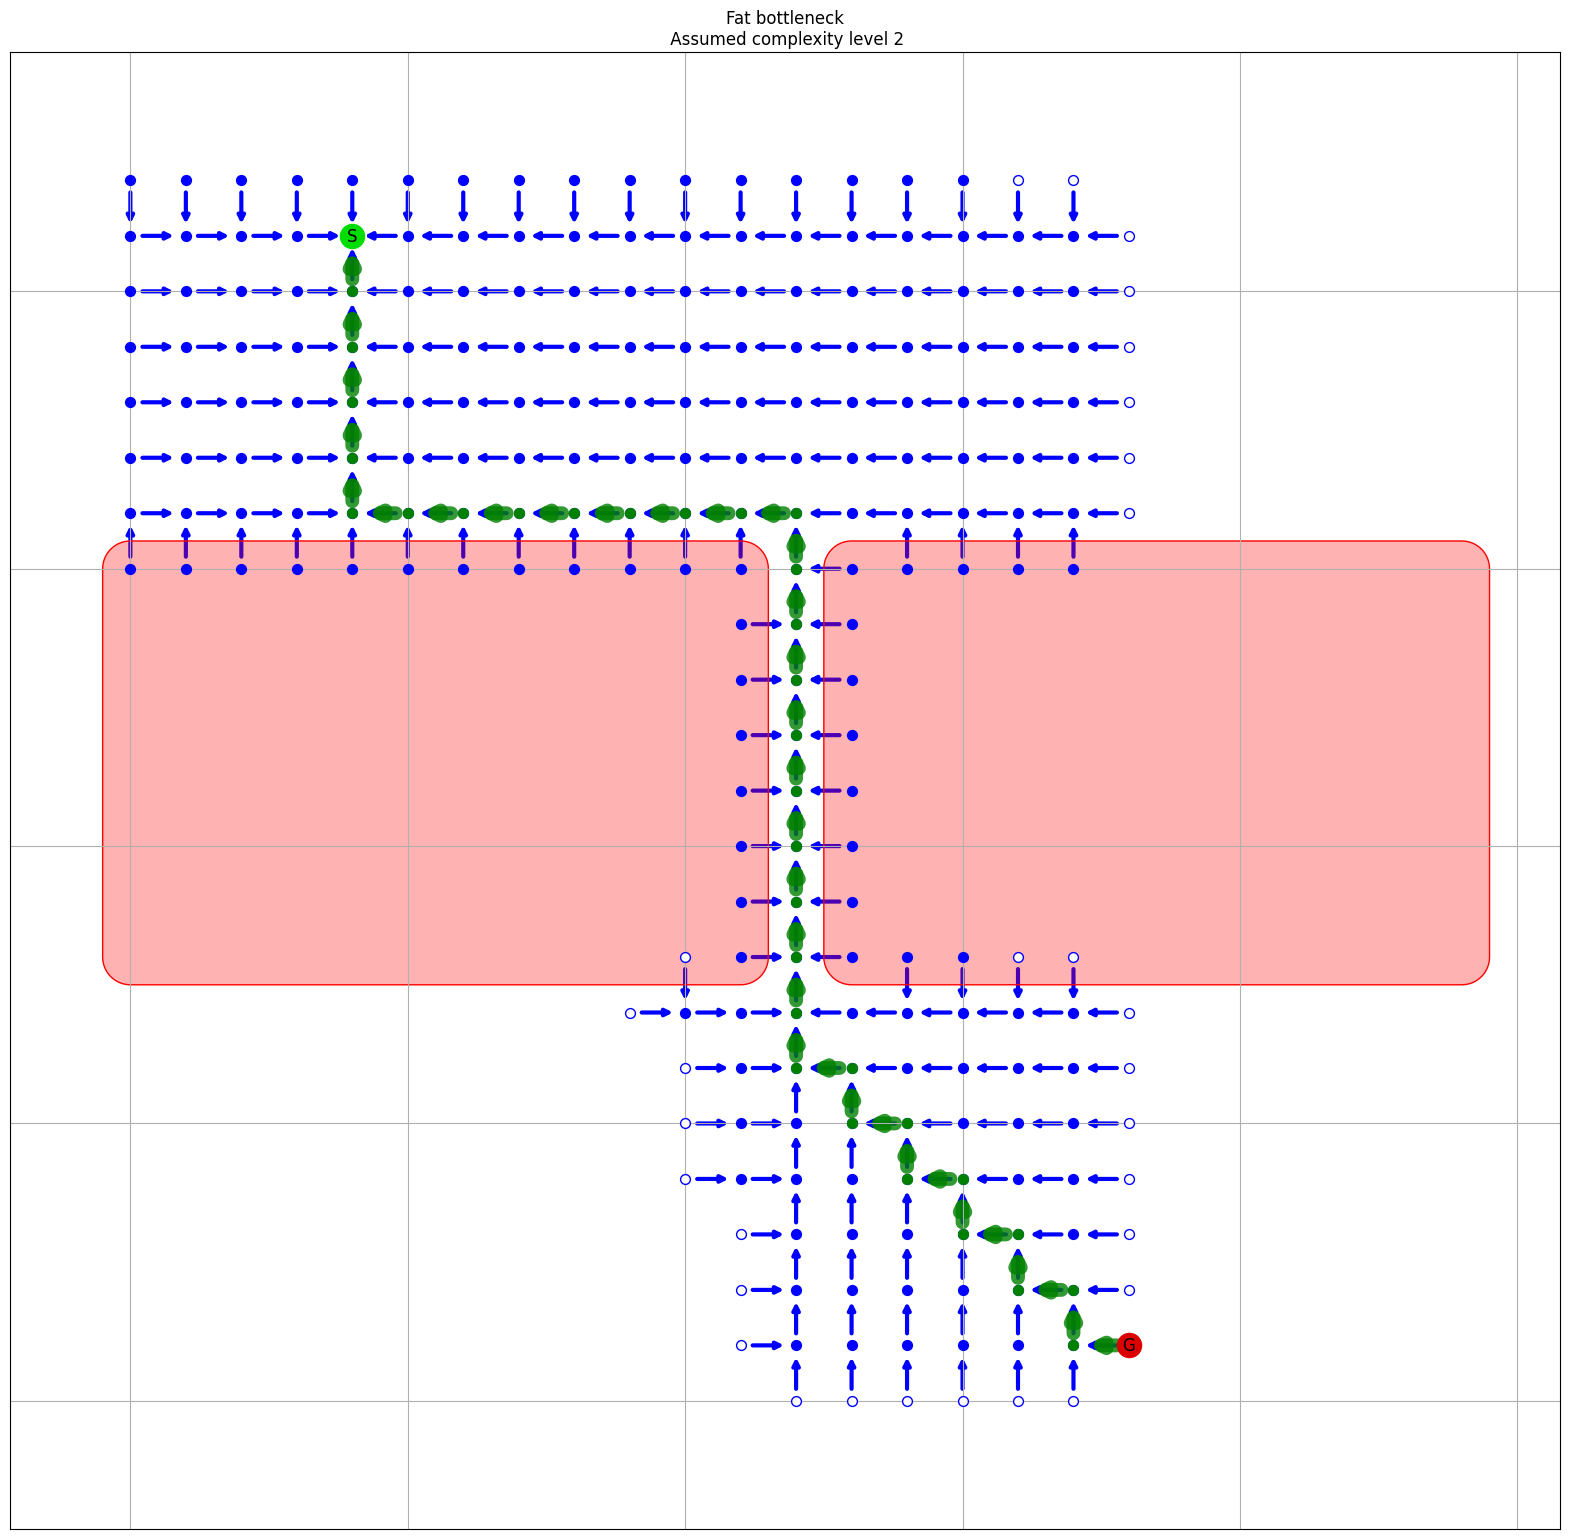

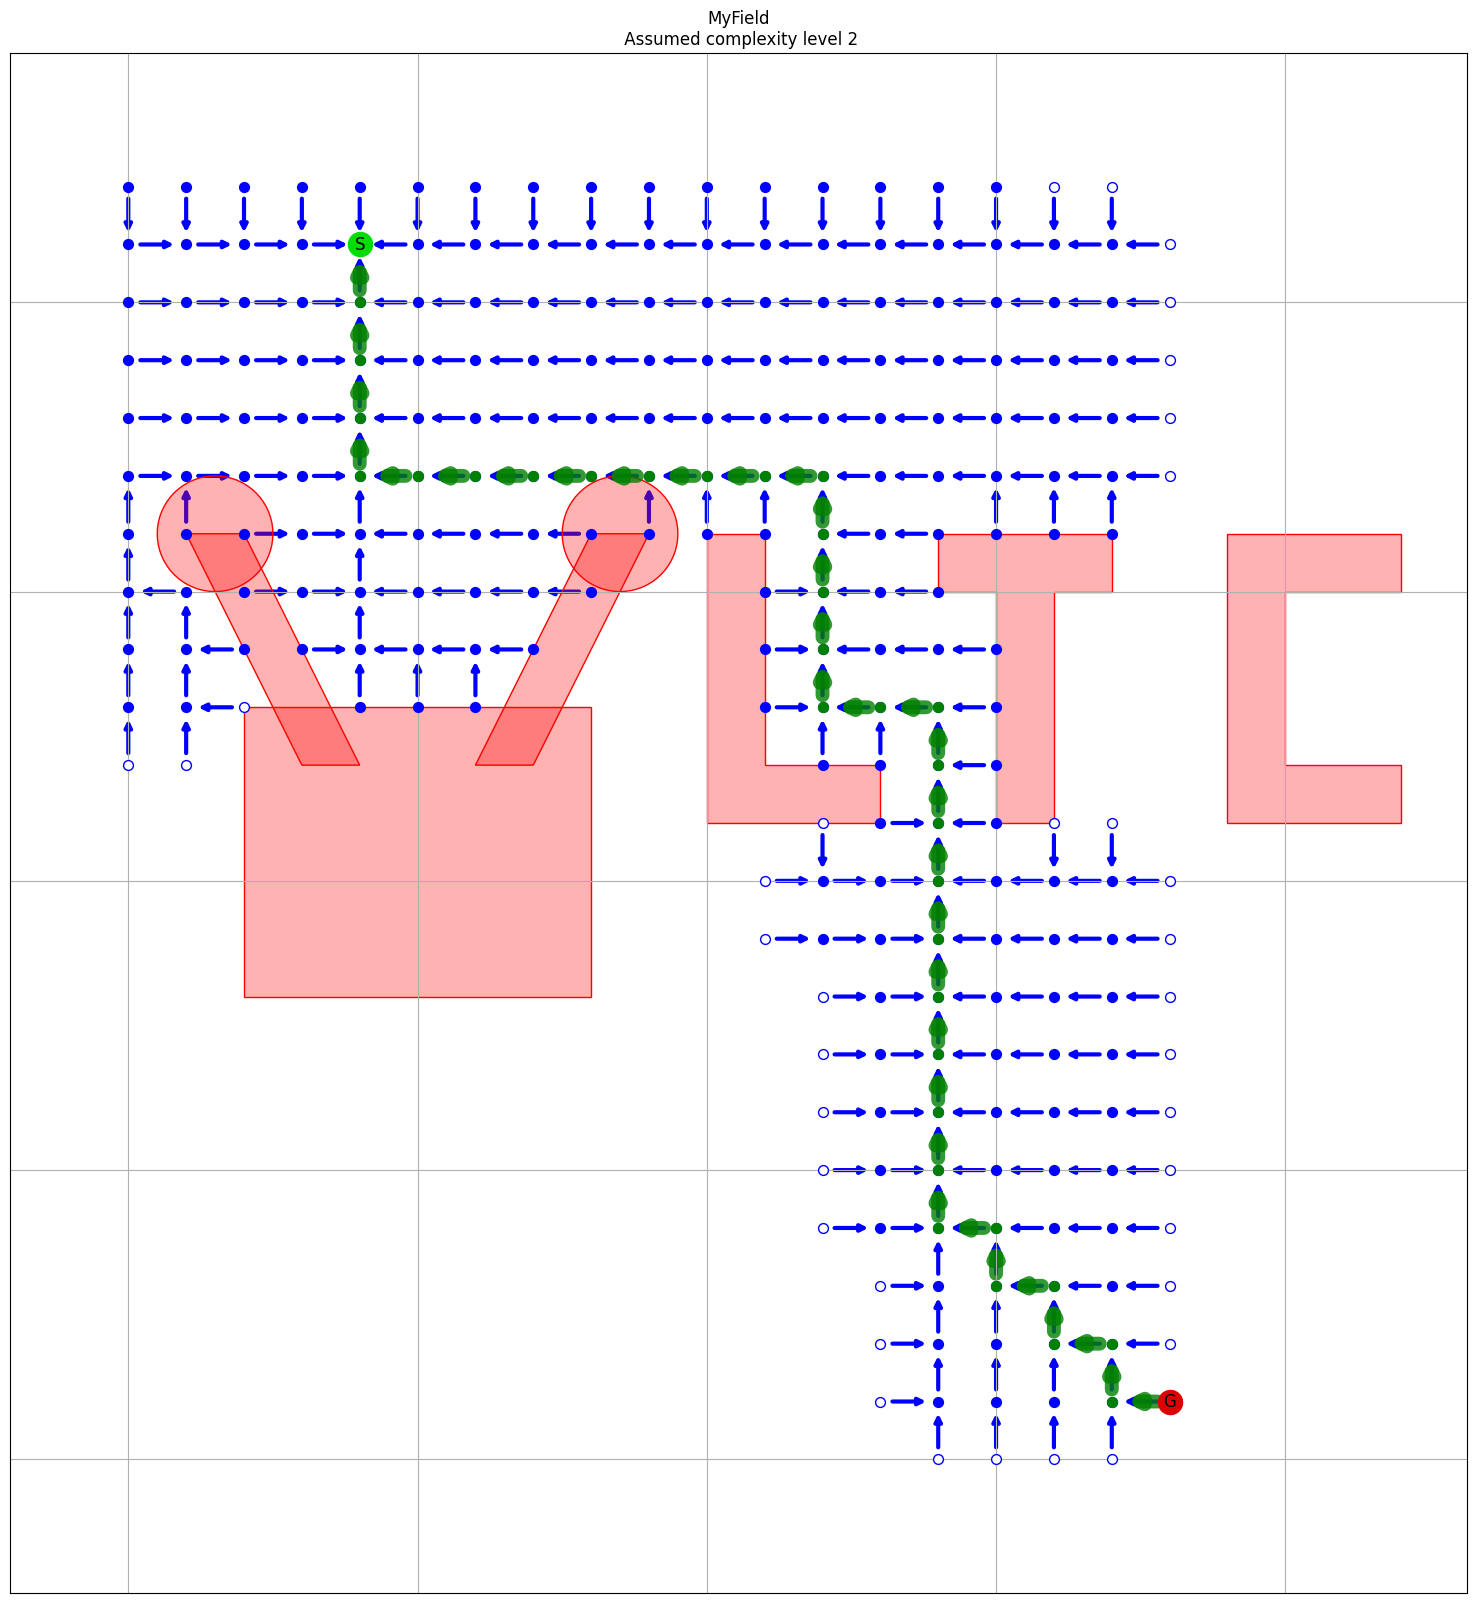

In [27]:
astarConfig = dict()
astarConfig["w"] = .5
astarConfig["heuristic"]  = "euclidean"

for benchmark in ts.benchList:
    try:
        fig_local = plt.figure(figsize=(20,20))
        ax = fig_local.add_subplot(1,1,1)
        astar = ReopenAStar(benchmark.collisionChecker)
        solution = astar.planPath(benchmark.startList, benchmark.goalList, astarConfig)
        title = benchmark.name
        if solution == []:
            title += " (No path found!)"
        title += "\n Assumed complexity level " + str(benchmark.level)
        ax.set_title(title)
        aStarVisualize(astar, solution, ax=ax, nodeSize=50)
    except Exception as e:
        print("ERROR: ",benchmark.name, e)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

from shapely.geometry import Point, Polygon, LineString
from IPEnvironment import CollisionChecker

# Definition of a testing environment
trapField = dict()
trapField["obs1"] =   LineString([(6, 18), (6, 8), (16, 8), (16,18)]).buffer(1.0)

environment = CollisionChecker(trapField)


start = [[10,20]]
goal  = [[13,1]]

# AStar
astar = ReopenAStar(environment)

# To know what is part on the config please consult the documentation of planPath
astarConfig = dict()
astarConfig["w"] = .5

astarConfig["heuristic"]  = "euclidean"

# Erweiterung für Kantenkollision -- Ludwig
# NEU: Aktiviert Kantenkollisionsprüfung
astarConfig["checkEdgeCollision"] = True 
# Ende Erweiterung für Kantenkollision -- Ludwig

solution = astar.planPath(start, goal, astarConfig )

## Visualisierung

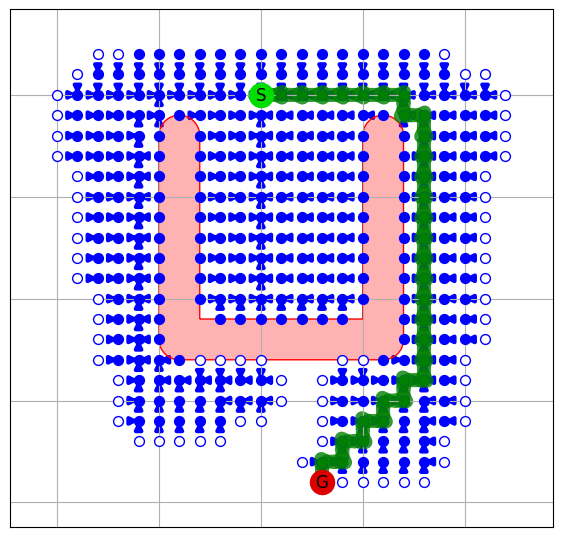

In [29]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
aStarVisualize(astar, solution, ax = ax, nodeSize=50)